# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The research paper states that the data represents 17 marketing campaigns by a Portuguese bank related to high interest deposit product. The campaign ran from May 2008 till November 2010. It consists of 79,354 contacts. Apparently with 8% (6,499) success rate. Meaning, customers accepting the offer. 

However, the actual dataset contains only 41,188 entries (half of the advertised amount in the paper).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Check for missing/empty values

In [6]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No values are missing in the dataset.

#### Check for duplicate entries

In [7]:
df.duplicated().sum()

12

12 entries are duplicated. Let's drop them now.

In [8]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

#### Process Target Variable - `y`

In [9]:
df['y'].value_counts(normalize = True)

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

Convert categorical encodings `yes`/`no` to `1`/`0` for future numerical analysis and probability of accepting the offer calculations during EDA. 

In [10]:
pd.set_option("future.no_silent_downcasting", True) # Nuke warning about downcasting string type to a numerical type
df['y'] = df['y'].replace({'yes': 1, 'no': 0})
df['y'] = df['y'].astype(np.int8) # Explicitly downcast string type to a numerical type
df['y'].info()

<class 'pandas.core.series.Series'>
Index: 41176 entries, 0 to 41187
Series name: y
Non-Null Count  Dtype
--------------  -----
41176 non-null  int8 
dtypes: int8(1)
memory usage: 361.9 KB


In [11]:
df['y'].value_counts(normalize = True)

y
0    0.887337
1    0.112663
Name: proportion, dtype: float64

Target variable is highly unbalanced. There's nothing much we can do.

#### Features Statistics

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


#### Helper Functions for Plots

In [13]:
# Plot histogram of the given column.
# It uses Seaborn.
def plot_column_histogram(column_name):
    # Create a palette to have individual colors for each column. 
    num_columns = len(df.columns)
    column_index = df.columns.get_loc(column_name)
    palette = sns.color_palette(palette = 'Set1', n_colors = num_columns)
    plt.figure(figsize = (10, 3))
    sns.histplot(df[column_name], color = palette[column_index])
    plt.tight_layout()
    plt.show()

In [14]:
# Plot probabilities of the customer accepting the offer against the given column.
# It uses Seaborn.
def plot_prob_of_success(column_name, kind = 'bar'):
    # Create a palette to have individual colors for each column. 
    num_columns = len(df.columns)
    column_index = df.columns.get_loc(column_name)
    palette = sns.color_palette(palette = 'Set1', n_colors = num_columns)
    plt.figure(figsize = (10, 3))
    if (kind == 'line'):
        ax = sns.lineplot(df.groupby(column_name)['y'].mean(), color = palette[column_index])
    elif (kind == 'bar'):
        ax = sns.barplot(df.groupby(column_name)['y'].mean(), color = palette[column_index])
    else:
        raise Exception('Undefined plot type.')
    ax.set_ylabel('Probability to accept the offer')
    plt.tight_layout()
    plt.show()

#### Analysis of Numerical Columns

##### Column - `age`

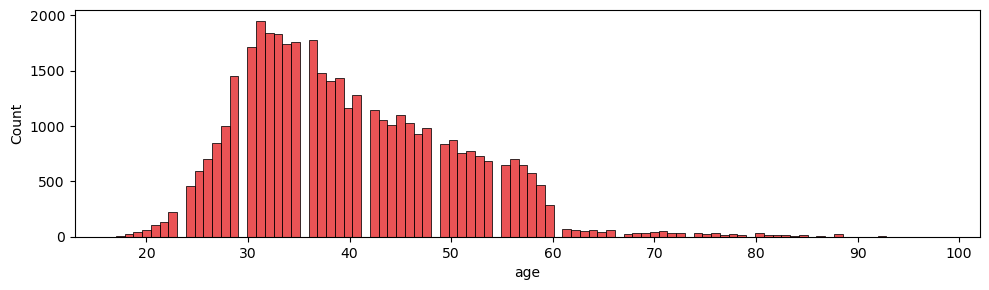

In [15]:
plot_column_histogram('age')

`age` is a bit skewed to right and probably quite important feature. We can easily fix it with log() transform.

In [16]:
df['age_log'] = np.log(df['age'])
df[['age', 'age_log']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.02380,10.420680,17.000000,32.000000,38.000000,47.000000,98.000000
age_log,41176.0,3.65697,0.253881,2.833213,3.465736,3.637586,3.850148,4.584967


##### Column - `duration`

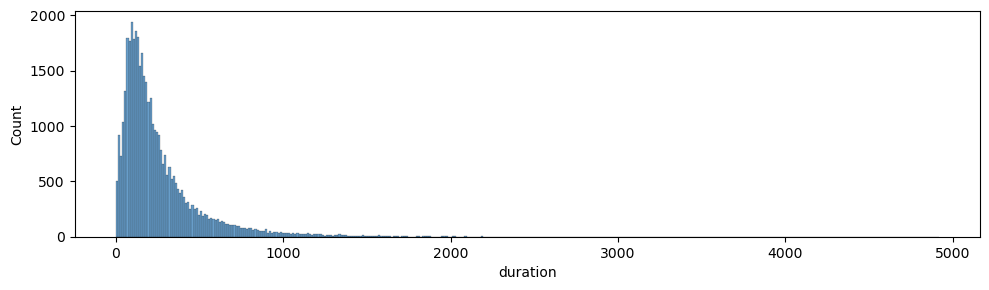

In [17]:
plot_column_histogram('duration')

Column `duration` is extremely skewed to the right. We could potentially try log() transform. However the original authors recommend to drop this column anyway as it has a strong correlation with the target variable -- `y` and that it expresses state of the call "after" the call and not "before" the call.

In [18]:
df.drop(columns = ['duration'], inplace = True)

##### Column - `campaign`

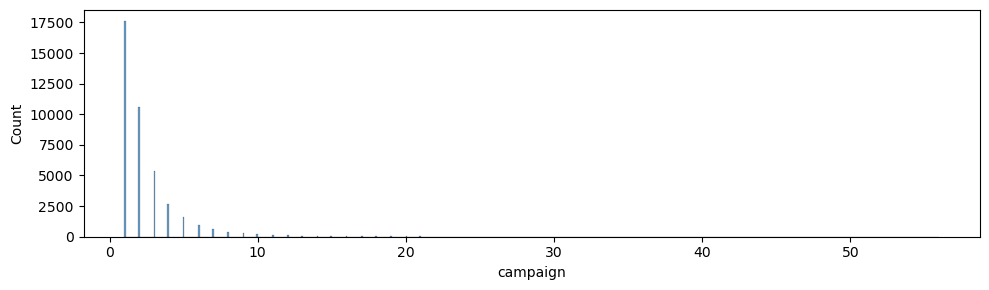

In [19]:
plot_column_histogram('campaign')

In [20]:
df['campaign'].value_counts(bins = 5, normalize = True)

(0.944, 12.0]    0.986230
(12.0, 23.0]     0.011342
(23.0, 34.0]     0.002064
(34.0, 45.0]     0.000340
(45.0, 56.0]     0.000024
Name: proportion, dtype: float64

Column `campaign` is extremely skewed to the right and "decaying". Binning or log() transform won't help.

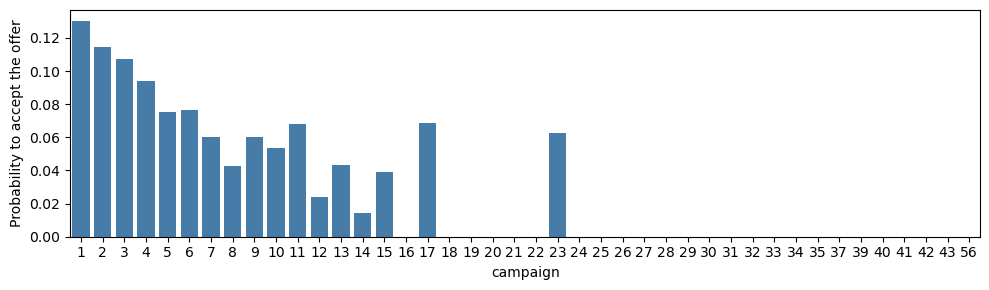

In [21]:
plot_prob_of_success('campaign')

There is some value in it. The best chance to convince a customer is in the first few calls.

##### Column - `pdays`

In [22]:
df['pdays'].value_counts(bins = 5, normalize = True)

(799.2, 999.0]    0.963207
(-1.0, 199.8]     0.036793
(199.8, 399.6]    0.000000
(399.6, 599.4]    0.000000
(599.4, 799.2]    0.000000
Name: proportion, dtype: float64

Column `pdays` is extremely skewed. Over 96% of values are `999` which means - client was not previously contacted. Only 4% of data has some valuable data. Let's drop it.

In [23]:
df.drop(columns = ['pdays'], inplace = True)

##### Column - `previous`

In [24]:
df['previous'].value_counts(bins = 7, normalize = True)

(-0.008, 1.0]    0.974160
(1.0, 2.0]       0.018312
(2.0, 3.0]       0.005246
(3.0, 4.0]       0.001700
(4.0, 5.0]       0.000437
(5.0, 6.0]       0.000121
(6.0, 7.0]       0.000024
Name: proportion, dtype: float64

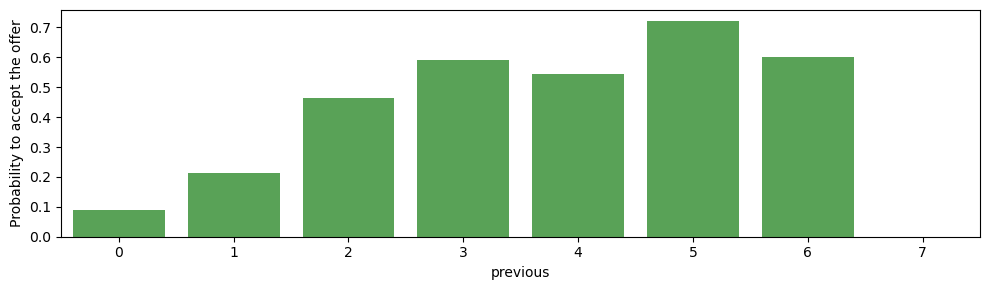

In [25]:
plot_prob_of_success('previous')

This variable indicates number of contacts prior to this campaign. Over 97% of values are between 0 and 1. This can't be fixed by log() transformation. However it has nice relation ship with chances of getting the customer signed in.

In [26]:
# df.drop(columns = ['previous'], inplace = True)

##### Columns - `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`

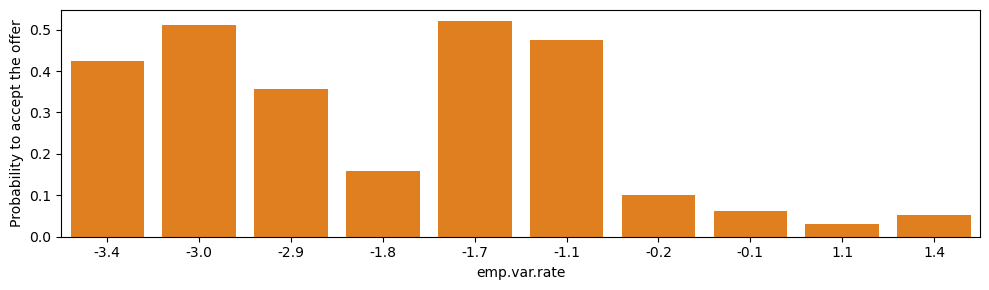

In [27]:
plot_prob_of_success('emp.var.rate')

These columns are national indexes and indicators of seasonal social and economical attributes present during when the call was made. They have domain specific values and hence weird distributions. They are possible candidates for removal but may play important contextual role in customer's decision making process. Let's use them as-is.  

#### Analysis of Categorical Columns

Generally they all will be encoded to numerical values later during Feature Engineering stage.

##### Column - `job`

In [28]:
df['job'].value_counts(normalize = True)

job
admin.           0.253036
blue-collar      0.224718
technician       0.163663
services         0.096343
management       0.071012
retired          0.041723
entrepreneur     0.035360
self-employed    0.034510
housemaid        0.025743
unemployed       0.024626
student          0.021250
unknown          0.008014
Name: proportion, dtype: float64

In [29]:
# OCD call - rename `admin.` to `admin`
df['job'] = df['job'].replace({'admin.': 'admin'})

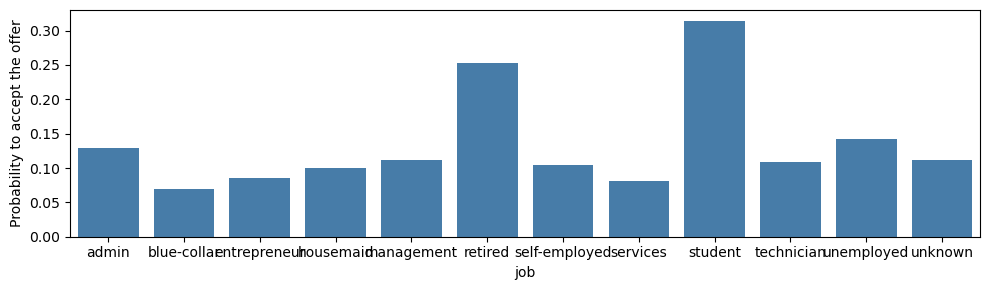

In [30]:
plot_prob_of_success('job')

`students` and `retired` are most likely to accept the offer. 

##### Column - `marital`

In [31]:
df['marital'].value_counts(normalize = True)

marital
married     0.605231
single      0.280843
divorced    0.111983
unknown     0.001943
Name: proportion, dtype: float64

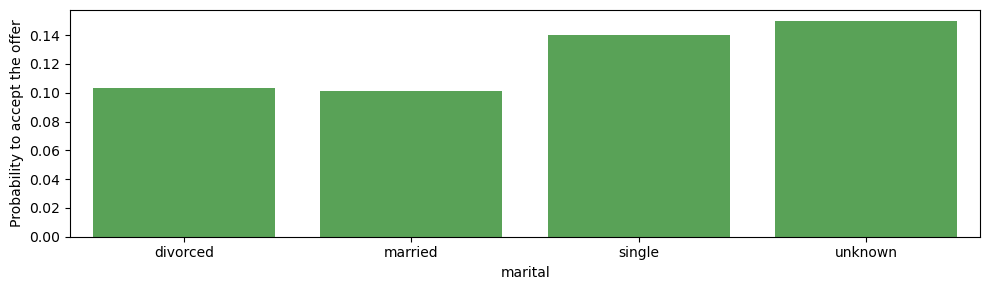

In [32]:
plot_prob_of_success('marital')

Does not look like martial status has any influence on accepting the offer.

##### Column - `education`

In [33]:
df['education'].value_counts(normalize = True)

education
university.degree      0.295415
high.school            0.231008
basic.9y               0.146809
professional.course    0.127259
basic.4y               0.101418
basic.6y               0.055639
unknown                0.042015
illiterate             0.000437
Name: proportion, dtype: float64

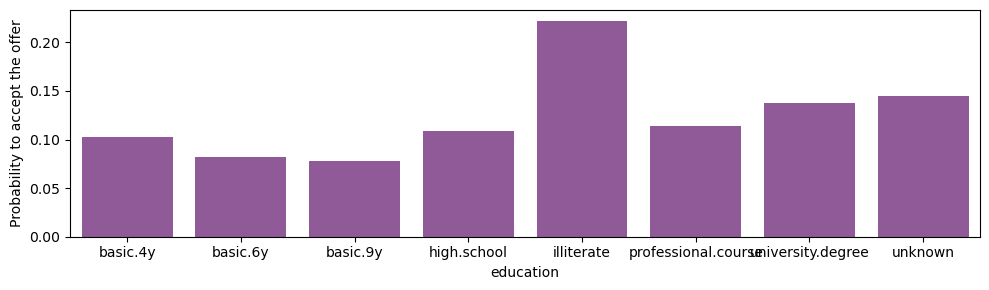

In [34]:
plot_prob_of_success('education')

Wow! People who are considered `illiterate` are most likely to accept the offer.

##### Column - `default`

In [35]:
df['default'].value_counts(normalize = True)

default
no         0.791165
unknown    0.208762
yes        0.000073
Name: proportion, dtype: float64

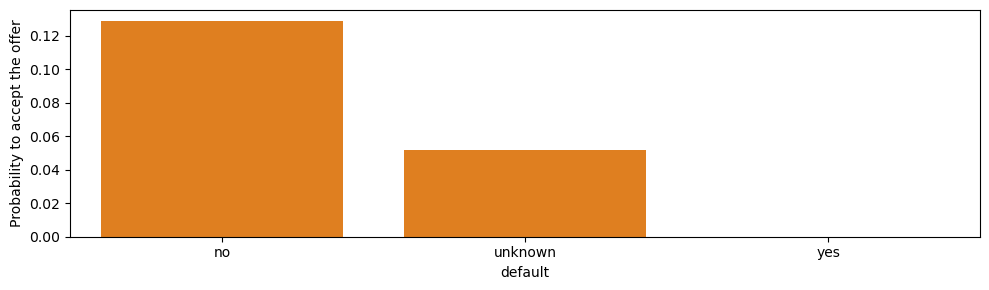

In [36]:
plot_prob_of_success('default')

People with no default are slightly more willing to accept the offer.

##### Column - `housing`

In [37]:
df['housing'].value_counts(normalize = True)

housing
yes        0.523873
no         0.452084
unknown    0.024043
Name: proportion, dtype: float64

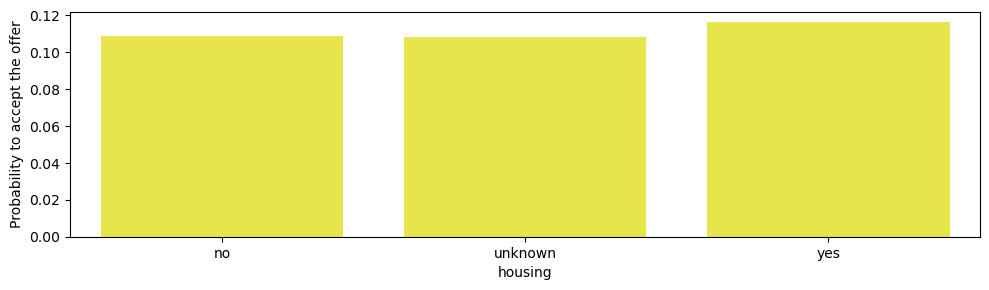

In [38]:
plot_prob_of_success('housing')

Regardless of home loan situation all customers have equal probability of accepting the offer. I think this column could be dropped.

##### Column - `loan`

In [39]:
df['loan'].value_counts(normalize = True)

loan
no         0.824218
yes        0.151739
unknown    0.024043
Name: proportion, dtype: float64

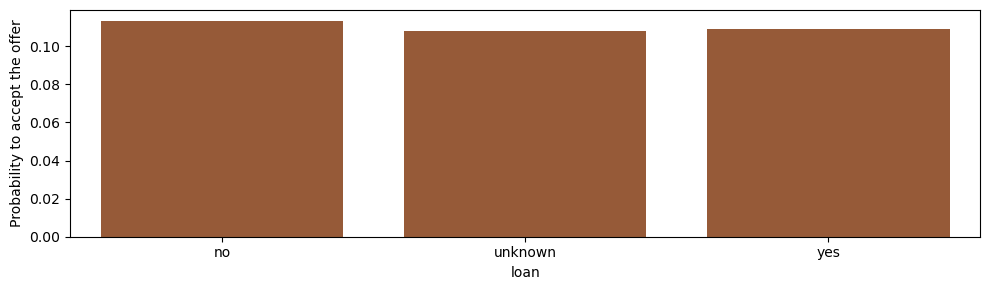

In [40]:
plot_prob_of_success('loan')

As above with the home loan, all customers have about equal probability of accepting the offer.

##### Column - `contact`

In [41]:
df['contact'].value_counts(normalize = True)

contact
cellular     0.634714
telephone    0.365286
Name: proportion, dtype: float64

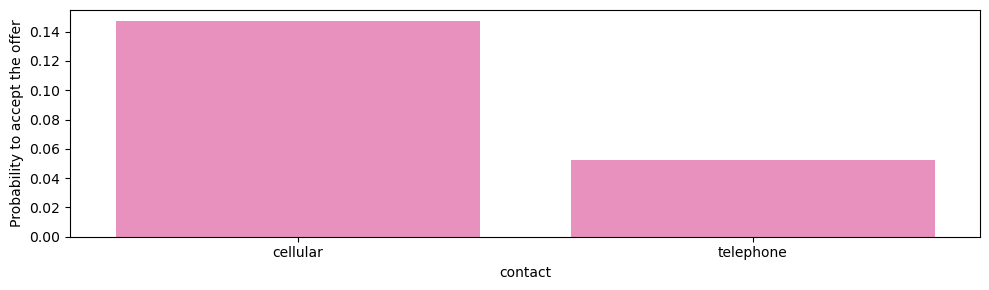

In [42]:
plot_prob_of_success('contact')

##### Column - `month`

In [43]:
df['month'].value_counts(normalize = True)

month
may    0.334345
jul    0.174106
aug    0.149990
jun    0.129153
nov    0.099573
apr    0.063896
oct    0.017413
sep    0.013843
mar    0.013260
dec    0.004420
Name: proportion, dtype: float64

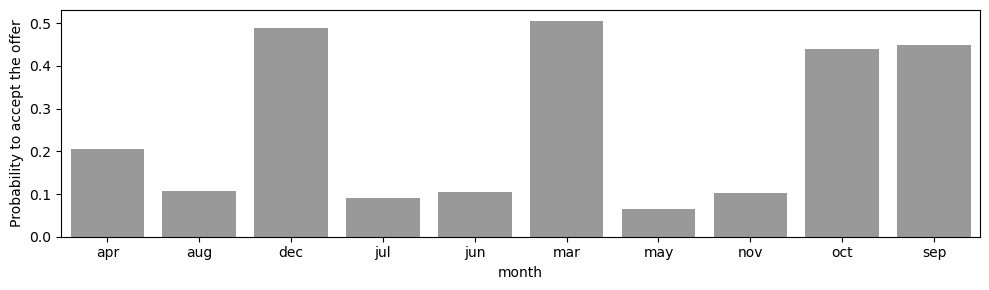

In [44]:
plot_prob_of_success('month')

Weird. There are only 10 months. January and February are missing. Why? Campaign ran from May 2008 till November 2010. We should see `jan` and `feb`. The data seems incomplete.

Anyway, fall and winter months increase chances of accepting the offer at ~50%.

In [45]:
# df.drop(columns = ['month'], inplace = True)

##### Column - `day_of_week`

In [46]:
df['day_of_week'].value_counts(normalize = True)

day_of_week
thu    0.209297
mon    0.206722
wed    0.197542
tue    0.196377
fri    0.190062
Name: proportion, dtype: float64

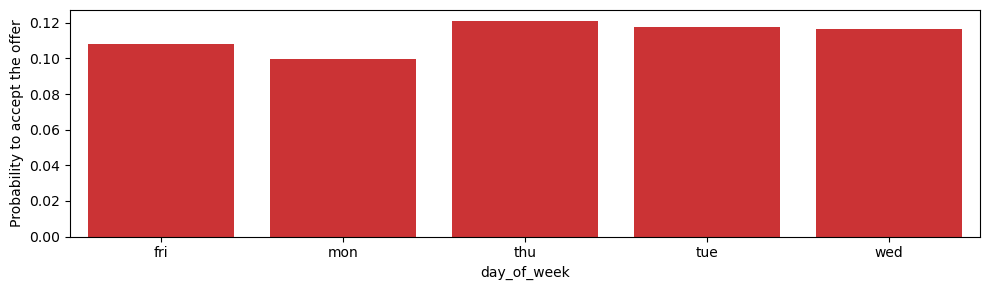

In [47]:
plot_prob_of_success('day_of_week')

It does not matter what day of the week the call was made to affect chance of accepting the offer.

##### Column - `poutcome`

In [48]:
df['poutcome'].value_counts(normalize = True)

poutcome
nonexistent    0.863391
failure        0.103264
success        0.033345
Name: proportion, dtype: float64

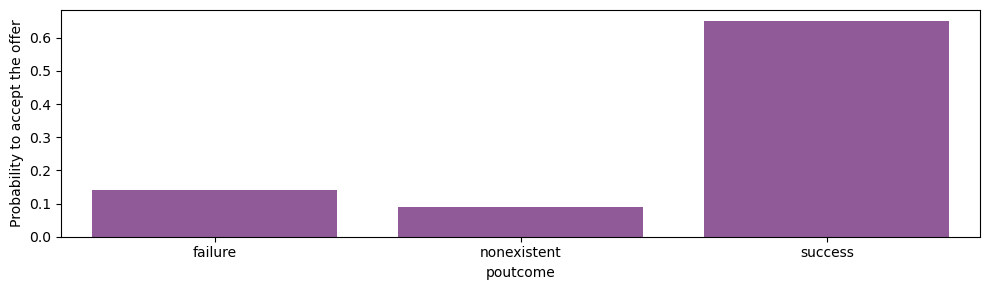

In [49]:
plot_prob_of_success('poutcome')

Previous successful engagement with the customer wins current call ~ 65%.

##### Finally Target Column - `y`

In [50]:
df['y'].value_counts(normalize = True)

y
0    0.887337
1    0.112663
Name: proportion, dtype: float64

Unfortunately our target variable is not evenly distributed.

#### Last Check on Duplicated Entries

After dropping a few columns we might have new duplicates.

In [51]:
df.duplicated().sum()

1783

In [52]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

#### Summary of Findings 
* Based on the original authors description of the variables, column `duration` seems irrelevant and was dropped.
* Target variable we try to predict is highly unbalanced. We would need more data.
* Categorical values should be encoded with numerical values.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The objective is to identify what attributes enhance the success of a telemarketing campaign for selling high interest deposits on the Portuguese banking market.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Most of numerical data has been already converted or transformed during EDA, like `log()` transform. We will only scale (standardize) numerical values. Categorical values will be encoded.

In [53]:
X = df.drop(columns = ['y'])
y = df['y']

In [54]:
numerical_columns = X.select_dtypes(include = 'number').columns.tolist()
# TODO: Write some nice routine removing log()-converted columns from the transformer. RegEx?
numerical_columns.remove('age')
print(numerical_columns)

['campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'age_log']


In [55]:
categorical_columns = X.select_dtypes(include = 'object').columns.tolist()
print(categorical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [56]:
column_transformer = make_column_transformer(
    (StandardScaler(), numerical_columns),
    (OrdinalEncoder(), categorical_columns),
    remainder = 'drop',
    n_jobs = -1,
)

# Only fit to get the column names to report. This transformer  will be used in Pipelines for modeling.
column_transformer.fit(X)
new_feature_names = column_transformer.get_feature_names_out()
print('Transformed feature names: ', new_feature_names)
print(len(new_feature_names))

Transformed feature names:  ['standardscaler__campaign' 'standardscaler__previous'
 'standardscaler__emp.var.rate' 'standardscaler__cons.price.idx'
 'standardscaler__cons.conf.idx' 'standardscaler__euribor3m'
 'standardscaler__nr.employed' 'standardscaler__age_log'
 'ordinalencoder__job' 'ordinalencoder__marital'
 'ordinalencoder__education' 'ordinalencoder__default'
 'ordinalencoder__housing' 'ordinalencoder__loan'
 'ordinalencoder__contact' 'ordinalencoder__month'
 'ordinalencoder__day_of_week' 'ordinalencoder__poutcome']
18


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [58]:
X_train.shape

(31514, 19)

In [59]:
X_test.shape

(7879, 19)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

#### Helper functions to automate building models and reporting their performance.

In [60]:
# Labels to display in the Confusion Matrix
target_labels = ['no', 'yes']

# Build a Pipeline with column transformer with the given model instance.
# Model will be tagged (in named_steps) with its own class name.
def build_pipeline(model):
    model_name = model.__class__.__name__
    pipe = Pipeline([
        ('transformer', column_transformer),
        (model_name, model),
    ])
    return pipe

# Train and validate given model. It will build a proper Pipeline
# and return it.
#
# Also print out results to the console and plot Confusion Matrix if
# requested.
def fit_and_validate(model, detailed_report = True, verbose = True):
    start_time = time.time()

    model_name = model.__class__.__name__
    pipe = build_pipeline(model)
    pipe.fit(X_train, y_train)
    y_hat_train = pipe.predict(X_train)
    y_hat_test = pipe.predict(X_test)
    train_acc_score = accuracy_score(y_train, y_hat_train)
    test_acc_score = accuracy_score(y_test, y_hat_test)
    
    end_time = time.time()
    
    elapsed_time = end_time - start_time

    if verbose:
        print('Report for model: ' + model_name)
        print()
        print('Training and Validation Time (s): ' + str(round(elapsed_time, 2)))
        print('Accuracy Score (Train): ' + str(train_acc_score))
        print('Accuracy Score (Test): ' + str(test_acc_score))

    if detailed_report:
        print()
        print('Classification report')
        print(classification_report(y_test, y_hat_test, target_names = target_labels))
        conf_m = confusion_matrix(y_test, y_hat_test)
        disp = ConfusionMatrixDisplay(confusion_matrix = conf_m, display_labels = target_labels)
        # Need to plot before we can get the axis.
        disp.plot()
        disp.ax_.set_title(model_name + ' - Confusion Matrix')
    return pipe, elapsed_time, train_acc_score, test_acc_score 

#### Create Dummy Classifier

In [61]:
_, _, _, _ = fit_and_validate(DummyClassifier(random_state = 2), detailed_report = False)

Report for model: DummyClassifier

Training and Validation Time (s): 0.8
Accuracy Score (Train): 0.8834168940788221
Accuracy Score (Test): 0.8834877522528239


The Dummy Classifier has accuracy of 88% and 0% for successful calls (as you would expect from 88% of unsuccessful vs. successful calls in the dataset).

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

Report for model: LogisticRegression

Training and Validation Time (s): 1.09
Accuracy Score (Train): 0.895252903471473
Accuracy Score (Test): 0.8999873080340145

Classification report
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      6961
         yes       0.70      0.25      0.37       918

    accuracy                           0.90      7879
   macro avg       0.80      0.62      0.66      7879
weighted avg       0.88      0.90      0.88      7879



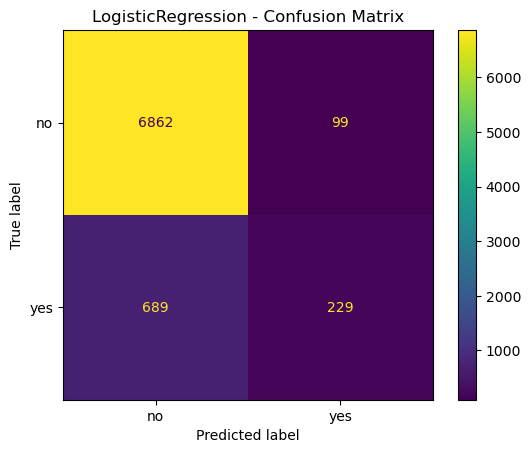

In [62]:
lr_pipe, _, _, _ = fit_and_validate(LogisticRegression(random_state = 2))

With the default Logistic Regression we can get precision score of 91% for the unsuccessful calls and 70% for the successful calls.

#### Feature Importance

In [63]:
lr = lr_pipe.named_steps['LogisticRegression']
lr_coefficients = lr.coef_[0]
new_feature_names = lr_pipe.named_steps['transformer'].get_feature_names_out()
lr_feature_importance = pd.DataFrame({
    'Feature Name': new_feature_names, 
    'Coefficient': lr_coefficients}).sort_values(by = 'Coefficient', ascending = False)

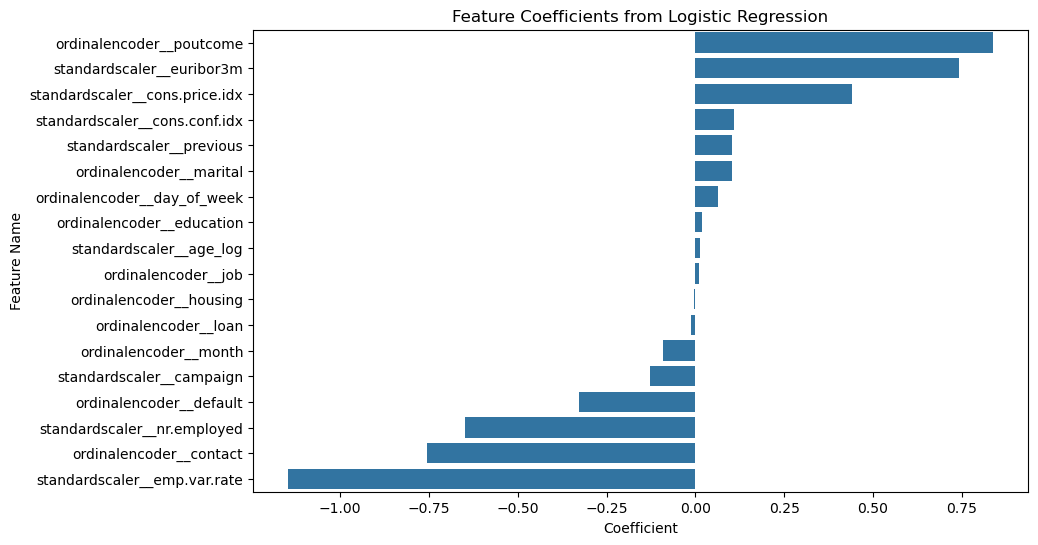

In [64]:
plt.figure(figsize = (10, 6))
sns.barplot(data = lr_feature_importance, x = 'Coefficient', y = 'Feature Name')
plt.title('Feature Coefficients from Logistic Regression')
plt.savefig('images/lr_coef.png', bbox_inches = 'tight')
plt.show()

Insights from the Simple Model training and Feature Importance analysis:
* It is easier to predict failure of a call than a successful one.
* `age` has little influence on classification. Also day of the week, month / season or education level.
* `poutcome` - previous engagement - has strongest positive influence.
* Current socioeconomic trends are also very important factors in decision making. Euribor interest rates and price index influence customers to accept the offer, where as unemployment negatively influences the customers.

### Problem 9: Score the Model

What is the accuracy of your model?

In [65]:
y_hat = lr_pipe.predict(X_test)
acc_score = accuracy_score(y_test, y_hat)
round(acc_score * 100, 2)

90.0

With the default Logistic Regression we can get accuracy of 90%.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [66]:
models = [
    LogisticRegression(random_state = 2), 
    DecisionTreeClassifier(random_state = 2), 
    KNeighborsClassifier(), 
    #SVC(random_state = 2),
]

results = []
pipelines = []
for model in models:
    model_name = model.__class__.__name__
    pipe, train_time, train_score, test_score = fit_and_validate(model, detailed_report = False, verbose = False)
    pipelines.append(pipe)
    results.append((model_name, train_time, train_score, test_score))

In [67]:
models_df = pd.DataFrame(data = results, columns = ['Model', 'Train Time', 'Train Score', 'Test Score']).set_index('Model').sort_values(by = 'Test Score', ascending = False)
models_df

,Train Time,Train Score,Test Score
Model,,,
LogisticRegression,0.947893,0.895253,0.899987
KNeighborsClassifier,0.970124,0.908200,0.886280
DecisionTreeClassifier,0.467662,0.994986,0.835893


Logistic regression seems like a true winner given the current data. Best test score and shortest time to train and validate.

#### Feature Importance

In addition, let's extract Feature Importance from the Decision Tree Classifier and compare with Logistic Regression coefficients extracted earlier.

In [68]:
# DecisionTreeClassifier model is at index 1 
dtc_pipe = pipelines[1]
dtc = dtc_pipe.named_steps['DecisionTreeClassifier']
feature_importances = dtc.feature_importances_
dtc_feature_importance = pd.DataFrame({
    'Feature Name': new_feature_names, 
    'Importance': feature_importances}).sort_values(by = 'Importance', ascending = False)

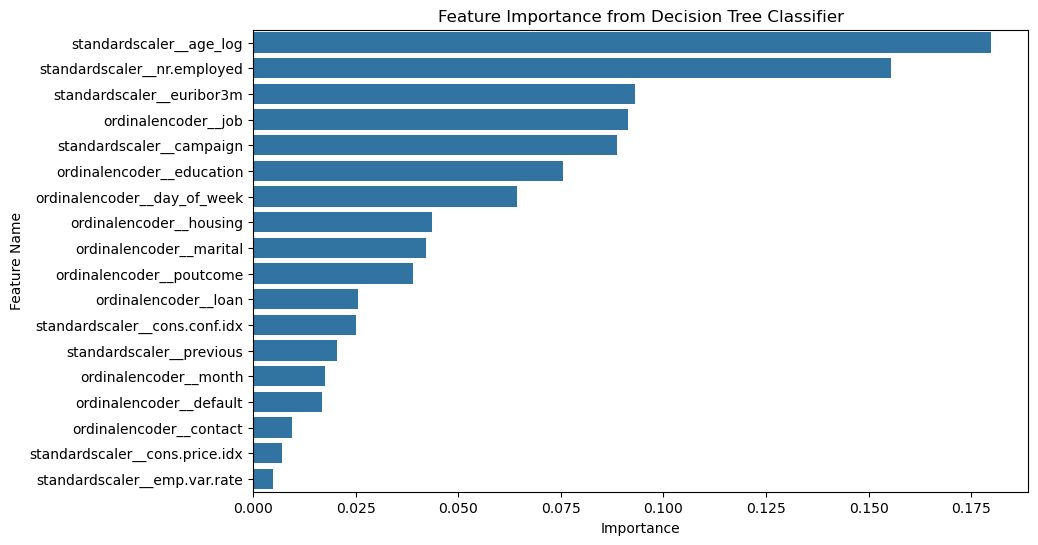

In [69]:
plt.figure(figsize = (10, 6))
sns.barplot(data = dtc_feature_importance, x = 'Importance', y = 'Feature Name')
plt.title('Feature Importance from Decision Tree Classifier')
plt.savefig('images/dct_importance.png', bbox_inches = 'tight')
plt.show()

* `age` plays important role in this model. Where as in LR it had minimal impact.
* Like in LR, socioeconomic factors seem to play also significant role in DTC.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [70]:
# New list of models to invalidate the other instances
models = [
    LogisticRegression(random_state = 2), 
    DecisionTreeClassifier(random_state = 2), 
    KNeighborsClassifier(), 
    # SVC in Grid Search takes forever. Disable for now.
    # SVC(random_state = 2),
]

# Parameter grids for each model in order as in `models` list.
param_grids = [
    {
        'LogisticRegression__C': [0.1, 1, 10, 100],
        'LogisticRegression__solver': ['liblinear'],
        'LogisticRegression__max_iter': [50, 500, 1000, 2000], 
        'LogisticRegression__penalty': ['l1', 'l2'],
    },
    {
        'DecisionTreeClassifier__criterion': ['gini', 'entropy'],
        'DecisionTreeClassifier__max_depth': [None, 10, 20, 30, 40, 50],
        'DecisionTreeClassifier__min_samples_split': [2, 10, 20],
        'DecisionTreeClassifier__min_samples_leaf': [1, 5, 10],
    },
    {
        'KNeighborsClassifier__n_neighbors': [3, 5, 7, 9],
        'KNeighborsClassifier__weights': ['uniform', 'distance'],
    },
    {
        'SVC__C': [0.1, 1, 10, 100],
        'SVC__kernel': ['linear','rbf'],
    }
]

In [71]:
# Perform Grid Search with Cross-Validation
results = []

for i, model in enumerate(models):
    start_time = time.time()

    model_name = model.__class__.__name__
    print('Grid Search: ' + model_name)
    pipe = build_pipeline(model)
    params = param_grids[i]
    grid_search = GridSearchCV(estimator = pipe, param_grid = params, cv = 5, n_jobs = -1, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)
    
    end_time = time.time()
    elapsed_time = end_time - start_time

    print('Tuning, Training and Validation Time (s): ' + str(round(elapsed_time, 2)))
    print('Best parameters: ' + str(grid_search.best_params_))
    print('Best accuracy score: ' + str(grid_search.best_score_))
    print()
    
    results.append((model_name, elapsed_time, grid_search.best_score_))

Grid Search: LogisticRegression
Tuning, Training and Validation Time (s): 10.16
Best parameters: {'LogisticRegression__C': 0.1, 'LogisticRegression__max_iter': 50, 'LogisticRegression__penalty': 'l2', 'LogisticRegression__solver': 'liblinear'}
Best accuracy score: 0.89566537079435

Grid Search: DecisionTreeClassifier
Tuning, Training and Validation Time (s): 16.31
Best parameters: {'DecisionTreeClassifier__criterion': 'entropy', 'DecisionTreeClassifier__max_depth': 10, 'DecisionTreeClassifier__min_samples_leaf': 5, 'DecisionTreeClassifier__min_samples_split': 20}
Best accuracy score: 0.8917306106168281

Grid Search: KNeighborsClassifier
Tuning, Training and Validation Time (s): 4.65
Best parameters: {'KNeighborsClassifier__n_neighbors': 9, 'KNeighborsClassifier__weights': 'uniform'}
Best accuracy score: 0.8881131294468039



In [72]:
models_df = pd.DataFrame(data = results, columns = ['Model', 'Train Time', 'Test Score']).set_index('Model').sort_values(by = 'Test Score', ascending = False)
models_df

,Train Time,Test Score
Model,,
LogisticRegression,10.156735,0.895665
DecisionTreeClassifier,16.307080,0.891731
KNeighborsClassifier,4.646341,0.888113


After hyper-parameter tuning we have the same best winner -- LR. Mind, due to computational requirements, I skipped SVM Classifier tuning. 

Also, DTC's accuracy certainly improved.

##### Questions